In [2]:
from cirq_grover import CirqGrover

grover = CirqGrover()
qc = grover.Build()

# Print the circuit
print(qc)

                  ┌──┐   ┌──┐   ┌──┐               ┌──┐   ┌──┐   ┌──┐                                       ┌──┐   ┌──┐   ┌──┐               ┌──┐   ┌──┐   ┌──┐
0: ───H───────@─────@──────────────────────────@─────@──────────────────────H───X───────@───X───H───────@─────@──────────────────────────@─────@──────────────────────H───X───────@───X───H───────M('result')───
              │     │                          │     │                                  │               │     │                          │     │                                  │               │
1: ───H───────┼────@┼──────@───────────────────┼────@┼──────@───────────────H───X───────@───X───H───────┼────@┼──────@───────────────────┼────@┼──────@───────────────H───X───────@───X───H───────M─────────────
              │    ││      │                   │    ││      │                           │               │    ││      │                   │    ││      │                           │               │
2: ───H───────┼────┼┼─────@┼──

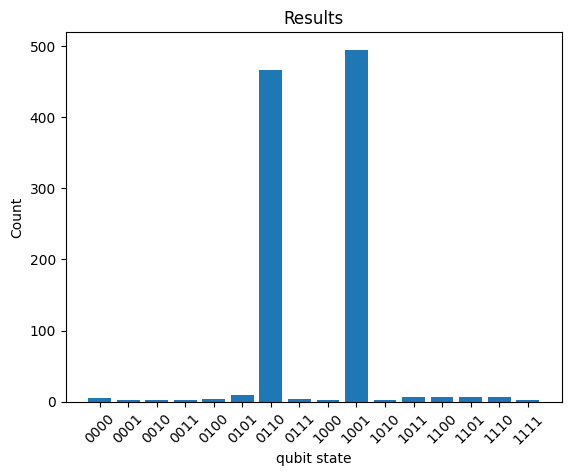

In [3]:
import cirq
import matplotlib.pyplot as plt
import qsimcirq

simulator = qsimcirq.QSimSimulator()
result = simulator.run(qc, repetitions=1024)
counts = result.histogram(key="result")

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

_ = cirq.plot_state_histogram(
    result, 
    plt.subplot(), 
    title = 'Results',
    ylabel = 'Count',
    tick_label=binary_labels(4))

plt.xticks(rotation=45)
plt.show()